# Create Histogram of the given image and perform histogram equalization

### Algorithm 
    1. Load the image matrix and create a dictionary with keys as pixel and values as frequency of each pixel value
    2. Add keys for missing pixels with initial value 0
    3. Find the cumulative sum for each pixel frequency and save them as value in dictionary
    4. Divide each cumulative sum by the maximum pixel frequency and save them in dictionary
    5. Multiply each pixel from the above to the maximum pixel value and save them in dictionary
    6. Replace each pixel of the existing image with the newly mapped pixels for the equalized histogram
    7. Display the image and histogram for the equalized image

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [67]:
image=cv2.imread('lena.jpg',0)
white=np.ones((250,250,3),np.uint8)*255
black=np.zeros((250,250,3),np.uint8)
gray=np.zeros((250,250,3),np.uint8)*255/2

In [72]:
# gradient between 0 and 1 for 256*256
array = np.linspace(0,1,256*256)

# reshape to 2d
gray = np.reshape(array,(256,256))

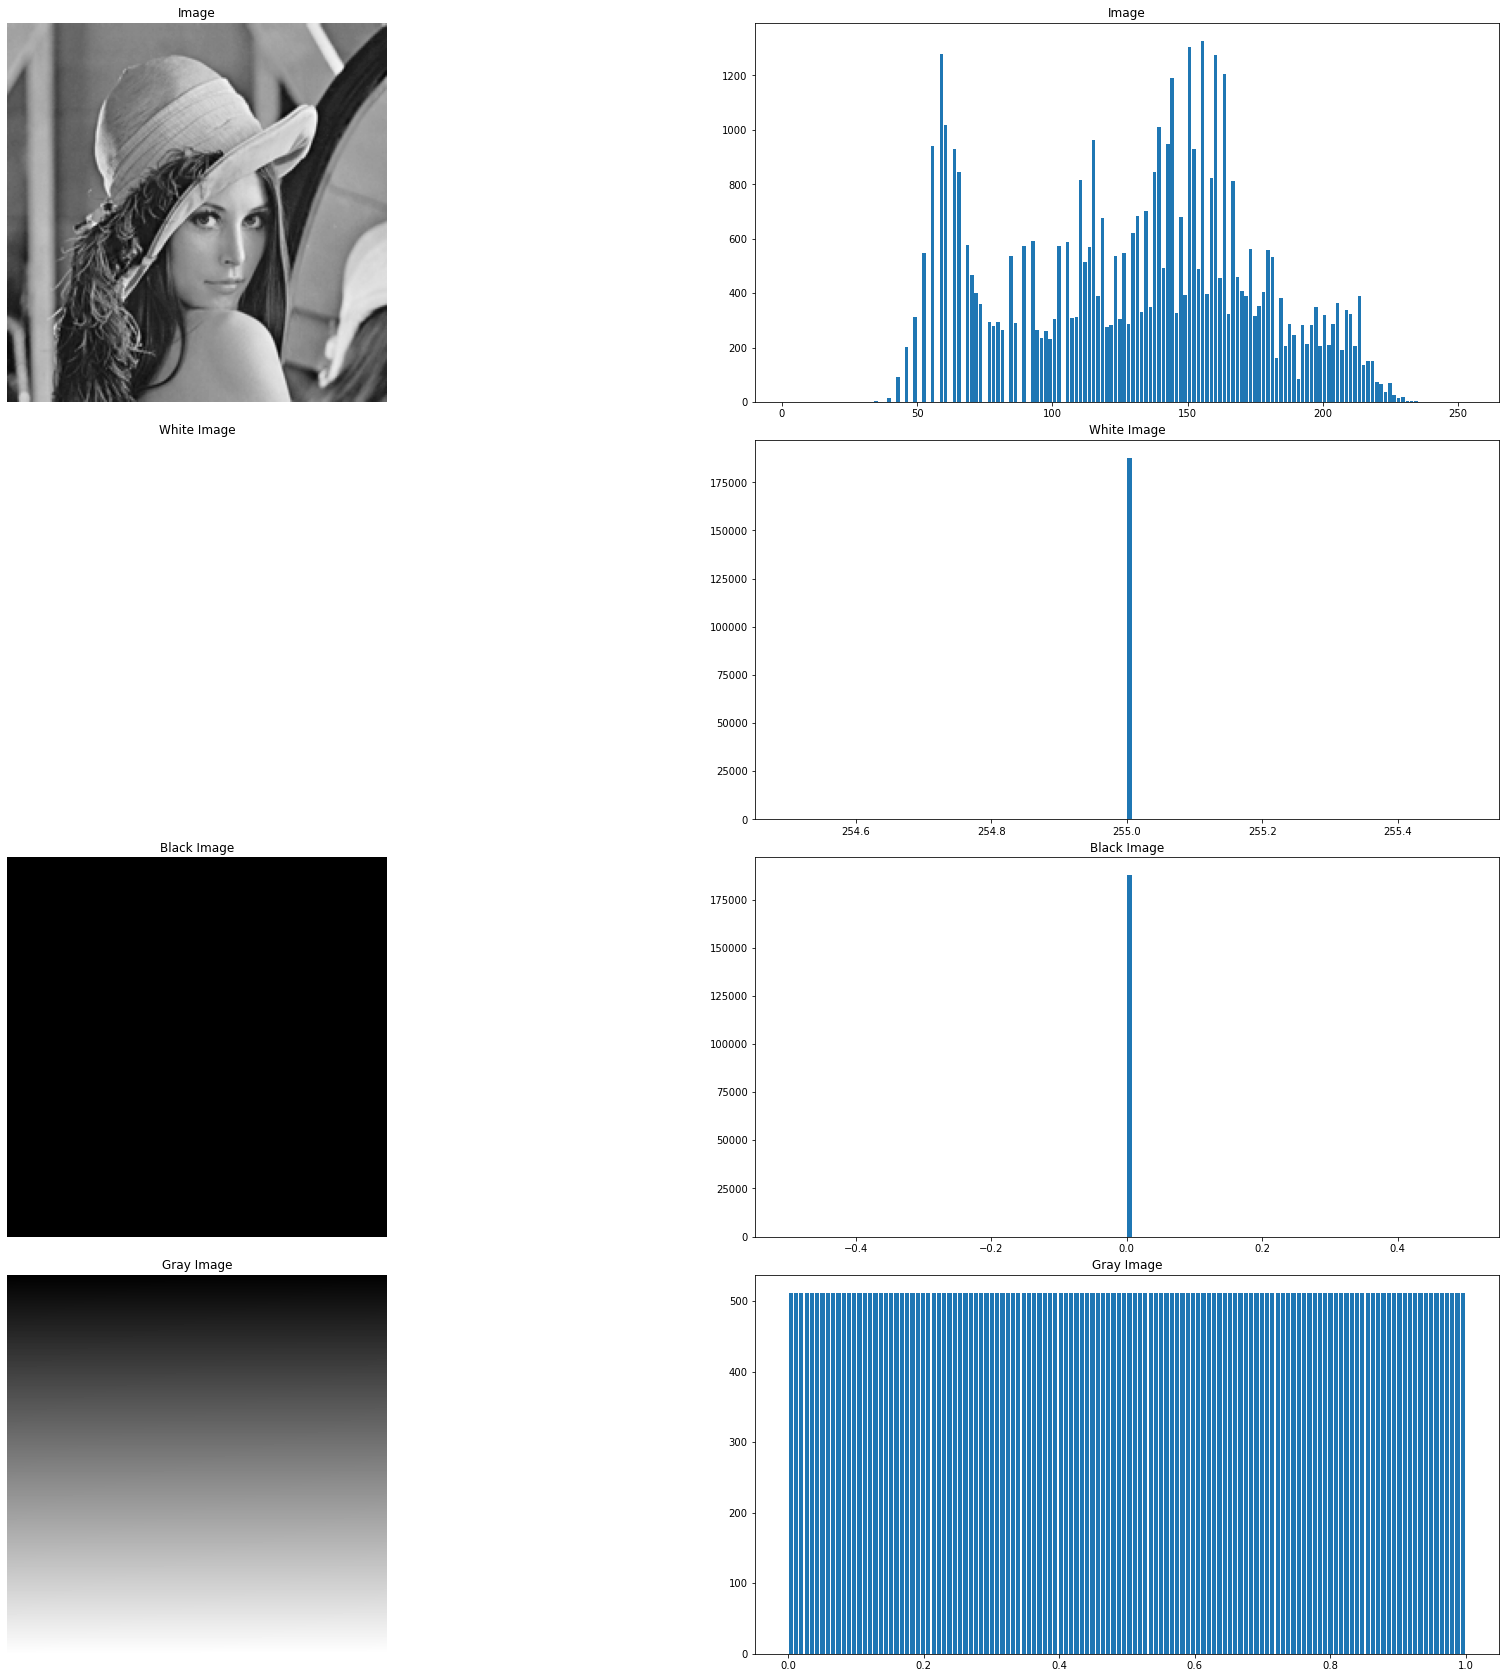

In [83]:
plt.figure(figsize=(30,30))
gs= gridspec.GridSpec(4,2)
gs.update(wspace=0.25, hspace=0.1)

fig = plt.subplot(gs[0])
plt.imshow(image, cmap='gray')
plt.title("Image")
plt.axis('off')

fig = plt.subplot(gs[1])
plt.hist(image.ravel(),128,rwidth=0.8)
plt.title("Image")
plt.xlim(-10,265)
# plt.axis('off')

fig = plt.subplot(gs[2])
plt.imshow(white, cmap='gray')
plt.title("White Image")
plt.axis('off')

fig = plt.subplot(gs[3])
plt.hist(white.ravel(),128,rwidth=0.8)
plt.title("White Image")
# plt.xlim(-10,265)
# plt.axis('off')

fig = plt.subplot(gs[4])
plt.imshow(black, cmap='gray')
plt.title("Black Image")
plt.axis('off')

fig = plt.subplot(gs[5])
plt.hist(black.ravel(),128,rwidth=0.8)
plt.title("Black Image")
# plt.xlim(-10,365)
# plt.axis('off')

fig = plt.subplot(gs[6])
plt.imshow(gray, cmap='gray')
plt.title("Gray Image")
plt.axis('off')

fig = plt.subplot(gs[7])
plt.hist(gray.ravel(),128,rwidth=0.8)
plt.title("Gray Image")
# plt.xlim(-10,265)
# plt.axis('off')
plt.show()

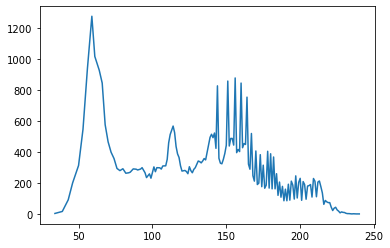

In [87]:
# Step 1 of the Algorithm
img_info = np.unique(image, return_counts=True)
img_freq_dict = dict()
for i in range(len(img_info[0])):
    img_freq_dict[img_info[0][i]] = img_info[1][i]
    
# plotting the dictionary
lists = sorted(img_freq_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()


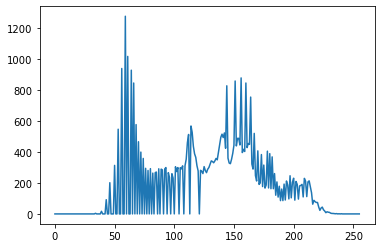

In [89]:
# Step 2 of the Algorithm
hist_dict = dict()
for i in range(256):
    hist_dict[i] = img_freq_dict.get(i, 0)
    
# plotting the dictionary
lists = sorted(hist_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()


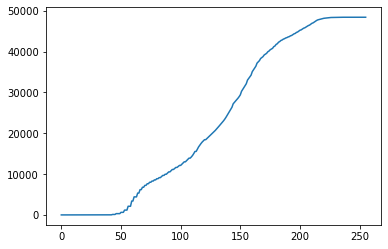

In [90]:
# Step 3 of the Algorithm
for i, key in enumerate(hist_dict.keys()):
    hist_dict[key] = hist_dict.get(i-1, 0) + hist_dict.get(i)
    
# plotting the dictionary
lists = sorted(hist_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

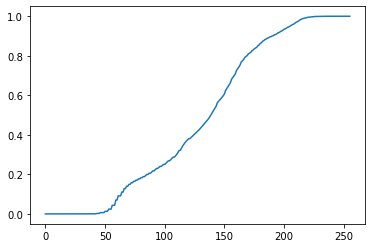

In [91]:
# Step 4 of the Algorithm
for i, key in enumerate(hist_dict.keys()):
    hist_dict[key] = hist_dict.get(i)/max(hist_dict.values())

# plotting the dictionary
lists = sorted(hist_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

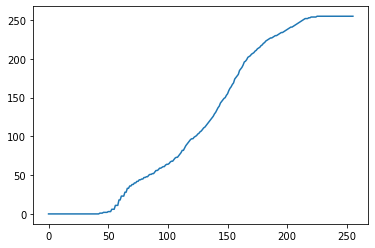

In [92]:
# Step 5 of the Algorithm
for i, key in enumerate(hist_dict.keys()):
    hist_dict[key] = np.round(hist_dict.get(i) * max(hist_dict.keys()))
    
# plotting the dictionary
lists = sorted(hist_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

In [93]:
# Step 6 of the Algorithm
final_img = np.zeros(image.shape)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        final_img[i][j] = hist_dict[image[i][j]]
final_img

array([[203., 203., 202., ..., 207., 215., 167.],
       [203., 202., 202., ..., 211., 223., 178.],
       [204., 199., 202., ..., 155., 114.,  64.],
       ...,
       [ 18.,  23.,  28., ...,  48.,  63.,  67.],
       [ 11.,  23.,  23., ...,  60.,  77.,  79.],
       [  6.,  23.,  18., ...,  72.,  90.,  94.]])

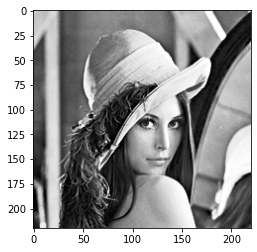

In [94]:
# Display the Histogram Equalized image
plt.imshow(final_img, cmap='gray')

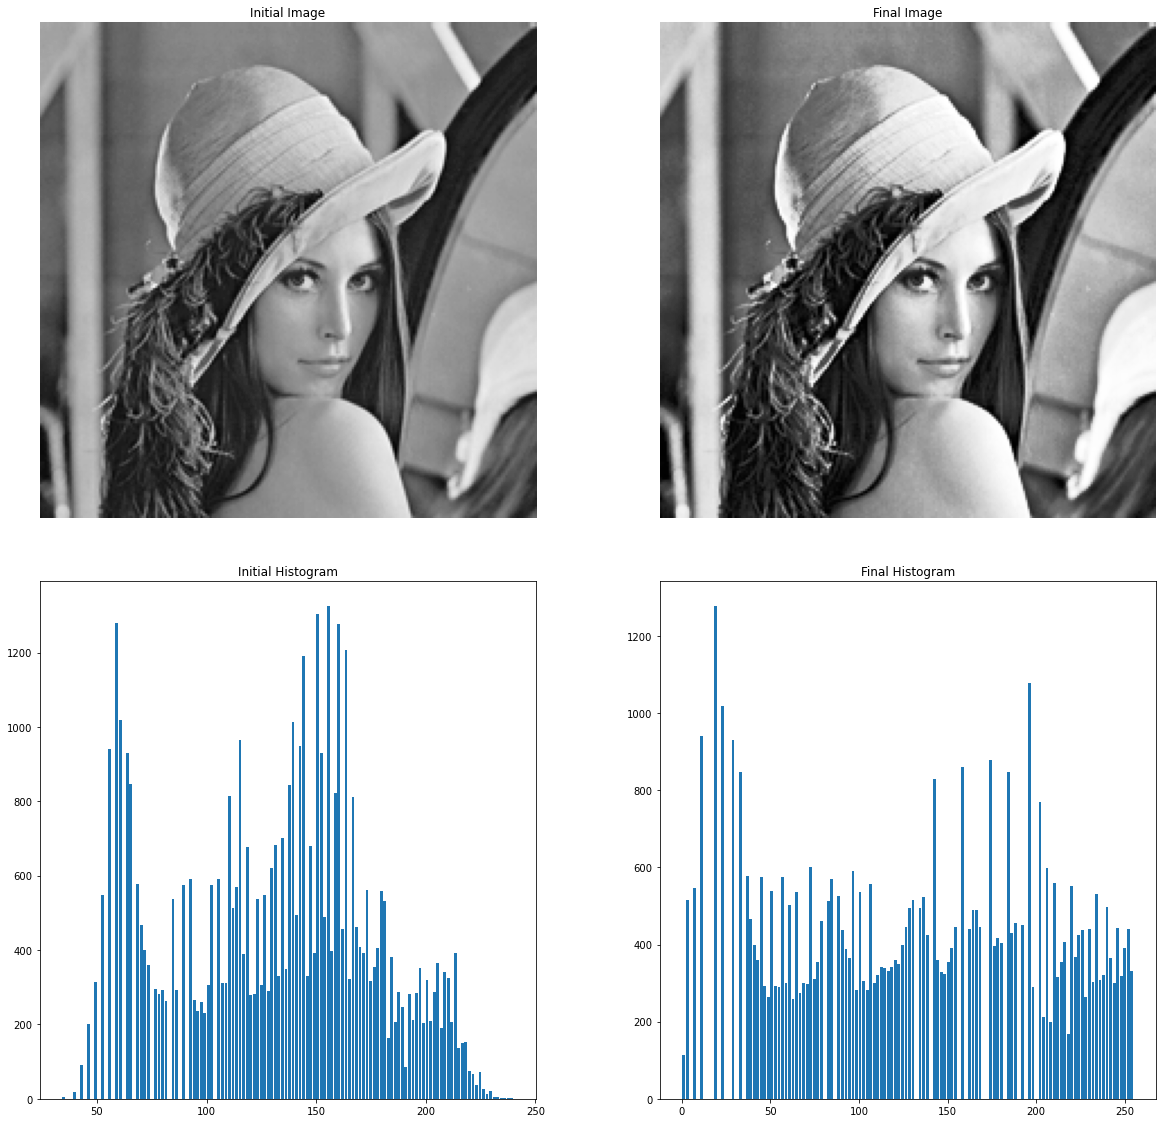

In [105]:
plt.figure(figsize=(20,20))
gs= gridspec.GridSpec(2,2)
gs.update(wspace=0.25, hspace=0.1)

fig = plt.subplot(gs[0])
plt.imshow(image, cmap='gray')
plt.title("Initial Image")
plt.axis('off')

fig = plt.subplot(gs[1])
plt.imshow(final_img, cmap='gray')
plt.title("Final Image")
plt.axis('off')

fig = plt.subplot(gs[2])
plt.hist(image.ravel(),128,rwidth=0.8)
plt.title("Initial Histogram")
# plt.axis('off')

fig = plt.subplot(gs[3])
# Display the Equalized Histogram
plt.hist(final_img.ravel(), 128, rwidth=0.8)
plt.title("Final Histogram")
# plt.axis('off')

plt.show()